In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import dtale
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Predictive maintanence
Predictive maintanence is the maintanence of machines at a predicted future time before the machine failure. This allows scheduled maintanence of the machines, reducing the unplanned downtime costs.

In this notebook, we will build a deployable end-to-end classification model to predict whether a machine failure will occur or not. We will train state-of-the-art gradient boosted decision tree (GBDT) algorithms, and compare their performances.

Data
We will use a simulated dataset taken from Matzka (2020). It consists of 10,000 data points stored as rows with features like product type, air temperature, process temperature, rotational speed, torque wear, machine failure. The machine failures are grouped into 5 subcategories. For simplicity, we will predict the machine failure feature. A concise summary of the data, pair plots, and the distribution of the target variable are given below.

In [2]:
# Now we load dataset

In [5]:
df = pd.read_csv('D:ml/ai4i2020.csv')


In [4]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df.tail(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [6]:
#here we check is there any null values or not
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [8]:
df.corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


In [9]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [10]:
#we visualize data

<AxesSubplot:>

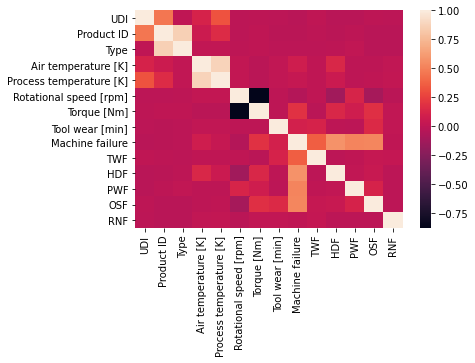

In [38]:
df.corr()
sns.heatmap(df.corr())


<AxesSubplot:ylabel='Machine failure'>

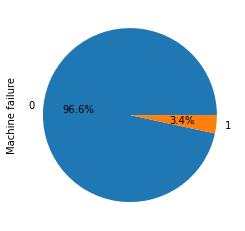

In [39]:
df['Machine failure'].value_counts().plot(kind='pie',autopct='%1.1f%%')


<AxesSubplot:ylabel='PWF'>

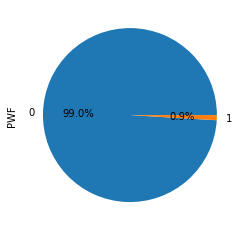

In [40]:
df['PWF'].value_counts().plot(kind='pie',autopct='%1.1f%%')


<AxesSubplot:ylabel='TWF'>

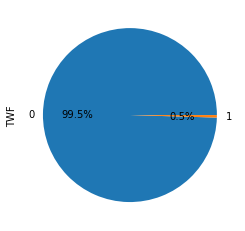

In [41]:
df['TWF'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='HDF'>

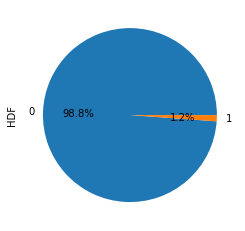

In [42]:
df['HDF'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='OSF'>

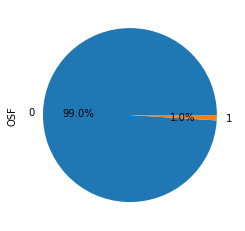

In [43]:
df['OSF'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='RNF'>

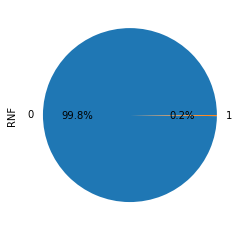

In [44]:
df['RNF'].value_counts().plot(kind='pie',autopct='%1.1f%%')

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Machine failure', ylabel='count'>

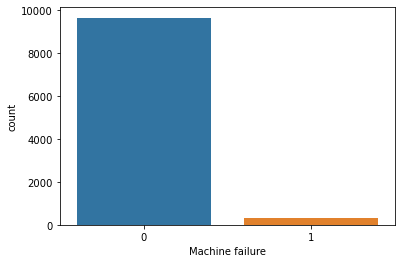

In [52]:
sns.countplot(df['Machine failure'])

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='TWF', ylabel='count'>

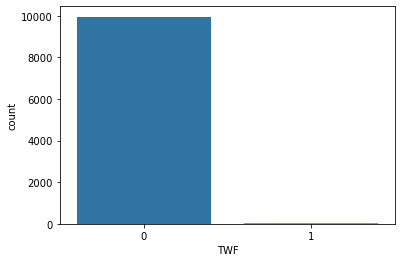

In [55]:
sns.countplot(df['TWF'])

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Machine failure', ylabel='Density'>

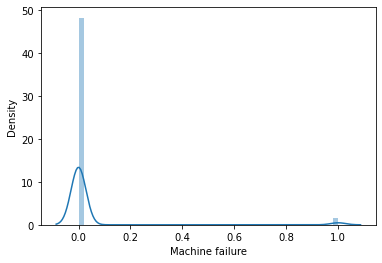

In [50]:
sns.distplot(df['Machine failure'])



D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='TWF', ylabel='Density'>

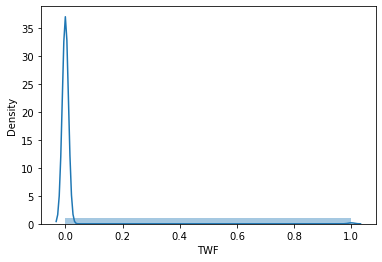

In [51]:
sns.distplot(df['TWF'],bins=1)

In [24]:
kk = df.drop('Product ID',axis='columns')

In [6]:
df2=df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'],axis=1)

In [26]:
sns.pairplot(df2,hue='Machine failure')

In [27]:
df2[df2['Machine failure']==1][['Type']].apply(pd.value_counts)

,Type
L,235
M,83
H,21


From above we can say that L more towards machine failure

In [28]:
k= df2[df2['Machine failure']==1][['Air temperature [K]']].apply(pd.value_counts)

In [29]:
k
#it mean that air temp 302,302.6,302.4 contubute more towards the machine failure

,Air temperature [K]
302.0,13
302.6,13
302.4,13
303.4,13
302.3,11
...,...
296.4,1
296.6,1
296.8,1
299.9,1


In [7]:
df2[df2['Machine failure']==1][['Rotational speed [rpm]']].apply(pd.value_counts)

,Rotational speed [rpm]
1336,6
1365,5
1362,5
1379,5
1372,5
...,...
1287,1
1289,1
1290,1
1295,1


In [ ]:
# here 1336,1365,1362 are the contubute more towards the machine failure

In [30]:

df2[df2['Machine failure']==1][['Torque [Nm]']].apply(pd.value_counts)

,Torque [Nm]
62.4,5
45.1,4
61.0,4
56.8,4
68.2,4
...,...
62.9,1
30.4,1
19.8,1
4.6,1


In [31]:
#for torque  62.4,45.1,61 contubute more to wards the failure

In [32]:
df2[df2['Machine failure']==1][['Tool wear [min]']].apply(pd.value_counts
                                                         )

,Tool wear [min]
207,9
208,8
203,7
218,6
215,6
...,...
84,1
81,1
80,1
79,1


In [33]:
#for tool wear 207,208,203,215  contrubute to wards the machine failure

In [34]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
 
    # Encode labels in column 'species'.
    df[c1]= label_encoder.fit_transform(df[c1])
 
    df[c1].unique()
    return df

In [35]:
LABEL_ENCODING('Product ID')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,7003,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,1003,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,1004,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,1005,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,1006,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,1001,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,9998,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,1002,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [36]:
LABEL_ENCODING('Type')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,7003,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,1003,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,1004,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,1005,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,1006,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,2,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,1001,0,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,9998,2,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,1002,0,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [62]:
x = df.drop('Machine failure',axis=1)
y = df['Machine failure']

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [64]:
print(X_train.shape,Y_train.shape)

(8000, 13) (8000,)


In [65]:
print(X_test.shape,Y_test.shape)

(2000, 13) (2000,)


In [89]:
kkk = LogisticRegression()
kkk.fit(X_train,Y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [91]:
prd = kkk.predict(X_test)
accuracy_score(Y_test,prd)

0.9765

In [67]:
model.score(X_test,Y_test)

0.9765

In [68]:
model.score(X_train,Y_train)

0.9755

In [87]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [88]:
pred = clf.predict(X_test)
accuracy_score(Y_test,pred)

0.9965

In [77]:
model.score(X_test,Y_test)

0.997

In [82]:
rn = RandomForestClassifier()
rn.fit(X_train,Y_train)

RandomForestClassifier()

In [85]:
rn.score(X_test,Y_test)

0.9985